In [10]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [12]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


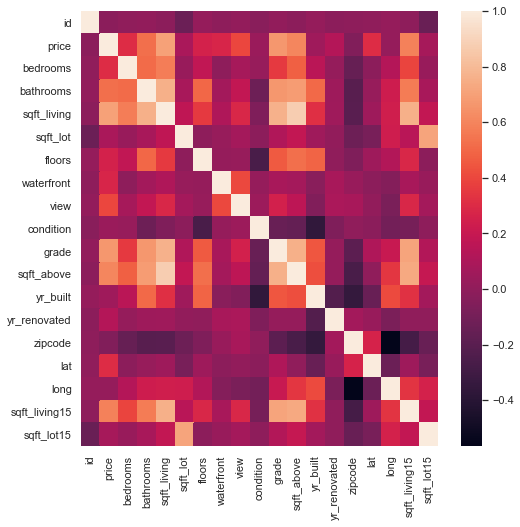

In [13]:
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(df.corr());

In [14]:
house_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
house_corrs

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
Name: price, dtype: float64

In [15]:
df['sqft_lot'].mean()

15099.408760475992

In [16]:
df['sqft_living15'].mean()

1986.6203176367087

In [17]:
df['zipcode'].value_counts().sort_index(ascending = True).head(29)

98001    361
98002    199
98003    280
98004    317
98005    168
98006    498
98007    141
98008    283
98010    100
98011    195
98014    124
98019    190
98022    233
98023    499
98024     80
98027    412
98028    283
98029    321
98030    256
98031    273
98032    125
98033    432
98034    545
98038    589
98039     50
98040    282
98042    547
98045    220
98052    574
Name: zipcode, dtype: int64

In [18]:
#onehotcoder!

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = df.price
X = df.drop(labels=['price'], axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 5)

In [23]:
eda_df = pd.concat([pd.DataFrame(y_train), X_train], axis=1).drop('id', axis=1).reset_index(drop=True)

In [24]:
eda_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.727700e+04,17277.000000,17277.000000,17277.000000,1.727700e+04,17277.000000,15356.000000,17232.000000,17277.000000,17277.000000,17277.000000,17277.000000,14195.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000
mean,5.403367e+05,3.374660,2.111333,2077.266192,1.503784e+04,1.491405,0.008075,0.237291,3.411646,7.654570,1784.938357,1970.874747,83.956252,98078.032818,47.559810,-122.214703,1987.588181,12637.828500
std,3.686163e+05,0.931114,0.766177,915.753595,4.099151e+04,0.540391,0.089500,0.771072,0.650234,1.167855,826.015132,29.354222,400.711193,53.478216,0.138647,0.140092,685.403769,25955.985544
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.240000e+05,3.000000,1.500000,1425.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470900,-122.329000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1974.000000,0.000000,98065.000000,47.571400,-122.231000,1840.000000,7620.000000
75%,6.412500e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,1997.000000,0.000000,98118.000000,47.677500,-122.126000,2360.000000,10101.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000


In [25]:
eda_df

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,405000.0,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,9,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,7,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,7,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018
3,4670000.0,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,8,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,288000.0,7/31/2014,3,1.75,1660,10440,1.0,0.0,0.0,3,7,1040,620.0,1978,0.0,98045,47.4448,-121.770,1240,10380
17273,525000.0,3/13/2015,3,2.50,2200,4544,2.0,0.0,0.0,3,8,2200,0.0,2000,0.0,98065,47.5319,-121.867,2400,5431
17274,290000.0,7/24/2014,2,1.50,770,850,2.0,0.0,0.0,3,7,770,0.0,2006,0.0,98116,47.5644,-122.388,1350,915
17275,465000.0,3/27/2015,5,1.75,2000,10246,1.0,0.0,2.0,3,7,1200,800.0,1953,0.0,98178,47.5084,-122.246,2340,9030


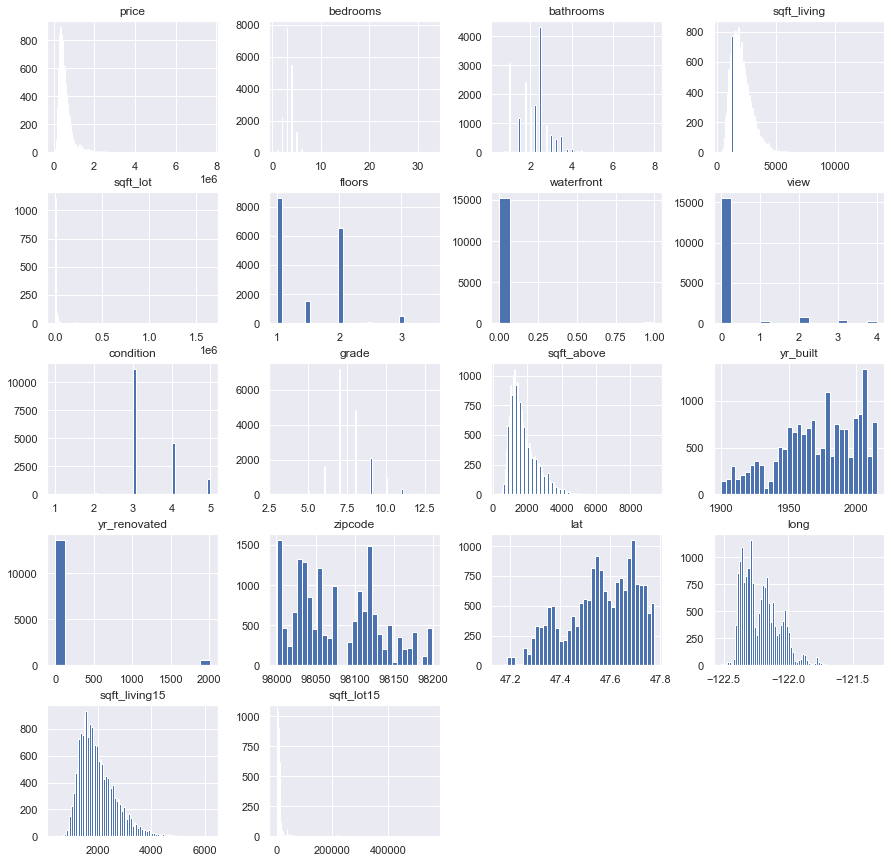

In [26]:
eda_df.hist(figsize = (15,15), bins = 'auto');

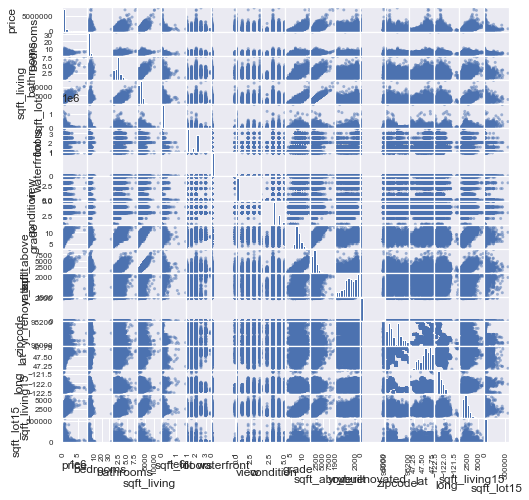

In [27]:
pd.plotting.scatter_matrix(eda_df);

In [28]:
model = sm.formula.ols(formula='price ~ sqft_living', data = eda_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.668e+04
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:38:50   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.803e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.574e+04   4958.793     -9.225      0.000   -5.55e+04    -3.6e+04
sqft_living   282.1408      2.184    129.165      0.000     277.859     286.422
==============================================================================
Omnibus:                    12090.176   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474100.489
Skew:                           2.885   Prob(JB):                         0.00
Kurtosis:                      28.006   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model2 = sm.formula.ols(formula = 'price ~ sqft_living + grade', data = eda_df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     9811.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:38:51   Log-Likelihood:            -2.3941e+05
No. Observations:               17277   AIC:                         4.788e+05
Df Residuals:                   17274   BIC:                         4.788e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.991e+05   1.51e+04    -39.733      0.000   -6.29e+05    -5.7e+05
sqft_living   186.6861      3.238     57.659      0.000     180.340     193.032
grade        9.819e+04   2538.835     38.675      0.000    9.32e+04    1.03e+05
==============================================================================
Omnibus:                    13875.551   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           897524.181
Skew:                           3.392   Prob(JB):                         0.00
Kurtosis:                      37.652   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
seattle_df = eda_df.loc[eda_df['zipcode'] > 98100]
Not_Seattle_df = eda_df.loc[eda_df['zipcode'] <= 98100]

In [31]:
model_seattle = sm.formula.ols(formula='price ~ sqft_living', data = seattle_df).fit()

model_seattle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     7595.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:38:51   Log-Likelihood:                -99224.
No. Observations:                7197   AIC:                         1.985e+05
Df Residuals:                    7195   BIC:                         1.985e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.085e+04   6832.101     -1.589      0.112   -2.42e+04    2538.653
sqft_living   303.9136      3.487     87.151      0.000     297.078     310.750
==============================================================================
Omnibus:                     3890.902   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122020.416
Skew:                           2.007   Prob(JB):                         0.00
Kurtosis:                      22.769   Cond. No.                     4.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model_nots = sm.formula.ols(formula='price ~ sqft_living', data = Not_Seattle_df).fit()

model_nots.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:38:51   Log-Likelihood:            -1.4029e+05
No. Observations:               10080   AIC:                         2.806e+05
Df Residuals:                   10078   BIC:                         2.806e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.399e+05   7001.349    -19.989      0.000   -1.54e+05   -1.26e+05
sqft_living   300.3077      2.836    105.873      0.000     294.748     305.868
==============================================================================
Omnibus:                     7734.033   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           337965.265
Skew:                           3.281   Prob(JB):                         0.00
Kurtosis:                      30.598   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
Not_Seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 17276
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          10080 non-null  float64
 1   date           10080 non-null  object 
 2   bedrooms       10080 non-null  int64  
 3   bathrooms      10080 non-null  float64
 4   sqft_living    10080 non-null  int64  
 5   sqft_lot       10080 non-null  int64  
 6   floors         10080 non-null  float64
 7   waterfront     8971 non-null   float64
 8   view           10053 non-null  float64
 9   condition      10080 non-null  int64  
 10  grade          10080 non-null  int64  
 11  sqft_above     10080 non-null  int64  
 12  sqft_basement  10080 non-null  object 
 13  yr_built       10080 non-null  int64  
 14  yr_renovated   8328 non-null   float64
 15  zipcode        10080 non-null  int64  
 16  lat            10080 non-null  float64
 17  long           10080 non-null  float64
 18  sqft_l

In [34]:
rurals = [98010, 98014, 98019, 98022, 98024, 98038, 98045, 98065, 98070]

In [35]:
suburbs = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98009, 98011, 98015, 98027, 98028, 98029, 98030, 98031, 98032, 98035, 98042, 98064, 98089, 98093, 98063, 98033, 98034, 98039, 98040, 98041, 98071, 98092, 98047, 98052, 98053, 98055, 98056, 98057, 98058, 98059, 98072, 98077, 98074, 98075]

In [36]:
Not_Seattle_df['zipcode'].isin(rurals)

0        False
2         True
3        False
7        False
10       False
         ...  
17270    False
17271    False
17272     True
17273     True
17276    False
Name: zipcode, Length: 10080, dtype: bool

In [37]:
rural_df = Not_Seattle_df.loc[Not_Seattle_df['zipcode'].isin(rurals)]

len(rural_df)

1563

In [38]:
suburb_df = Not_Seattle_df.loc[Not_Seattle_df['zipcode'].isin(suburbs)]

In [39]:
model_suburb = sm.formula.ols(formula = 'price ~ sqft_living', data = suburb_df).fit()

model_suburb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     9572.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:38:51   Log-Likelihood:            -1.1334e+05
No. Observations:                8114   AIC:                         2.267e+05
Df Residuals:                    8112   BIC:                         2.267e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.585e+05   8185.188    -19.358      0.000   -1.74e+05   -1.42e+05
sqft_living   318.8739      3.259     97.835      0.000     312.485     325.263
==============================================================================
Omnibus:                     5767.440   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197563.328
Skew:                           2.991   Prob(JB):                         0.00
Kurtosis:                      26.422   Cond. No.                     6.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model_rural = sm.formula.ols(formula='price ~ sqft_living', data = rural_df).fit()

model_rural.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     2545.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:39:23   Log-Likelihood:                -20470.
No. Observations:                1563   AIC:                         4.094e+04
Df Residuals:                    1561   BIC:                         4.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.534e+04   8078.153      5.613      0.000    2.95e+04    6.12e+04
sqft_living   175.5728      3.480     50.453      0.000     168.747     182.399
==============================================================================
Omnibus:                      898.320   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16463.207
Skew:                           2.299   Prob(JB):                         0.00
Kurtosis:                      18.220   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

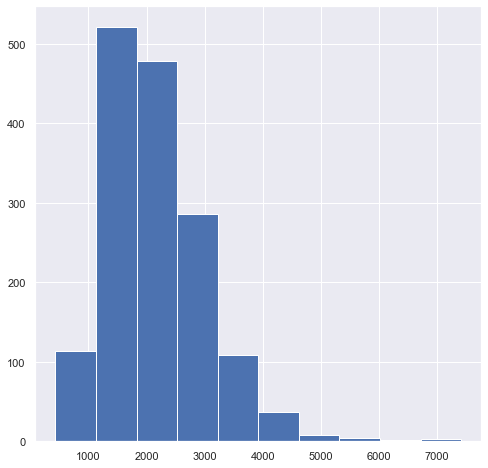

In [42]:
rural_df['sqft_living'].hist();

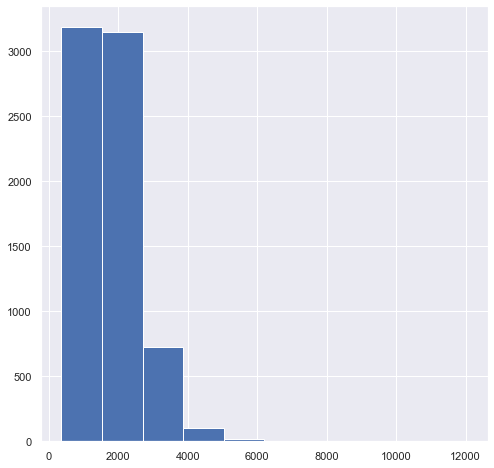

In [43]:
seattle_df['sqft_living'].hist();

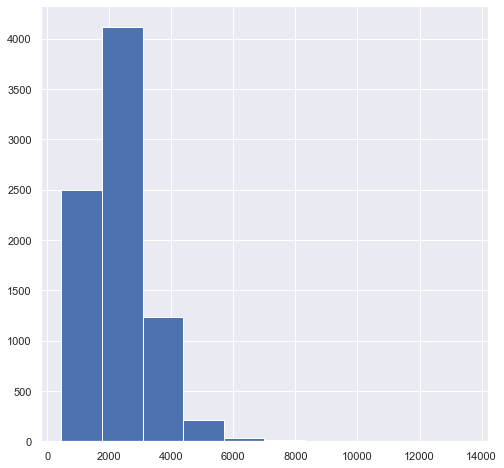

In [44]:
suburb_df['sqft_living'].hist();

In [45]:
suburb_df['sqft_living'].sort_values(ascending=False)

17186    13540
3932     10040
17189     9890
3         9640
7251      9200
         ...  
12535      610
11024      600
3730       530
14592      530
10230      460
Name: sqft_living, Length: 8114, dtype: int64

(0.0, 8000.0)

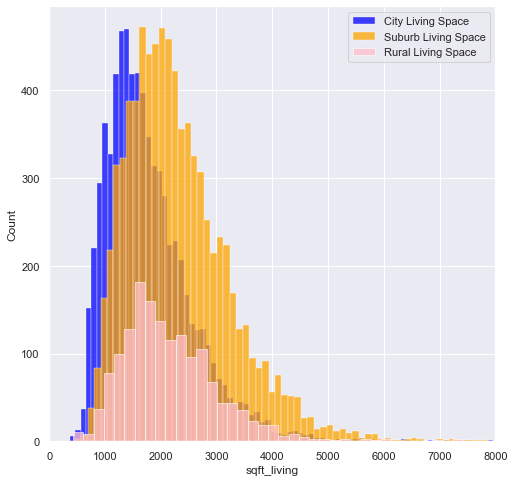

In [46]:
sns.histplot(data= seattle_df, x = 'sqft_living', color = 'blue', label ='City Living Space')
sns.histplot(data= suburb_df, x = 'sqft_living', color = 'orange', label ='Suburb Living Space')
sns.histplot(data= rural_df, x = 'sqft_living', color = 'pink', label='Rural Living Space')

plt.legend()
plt.xlim(0, 8000)

(0.0, 100000.0)

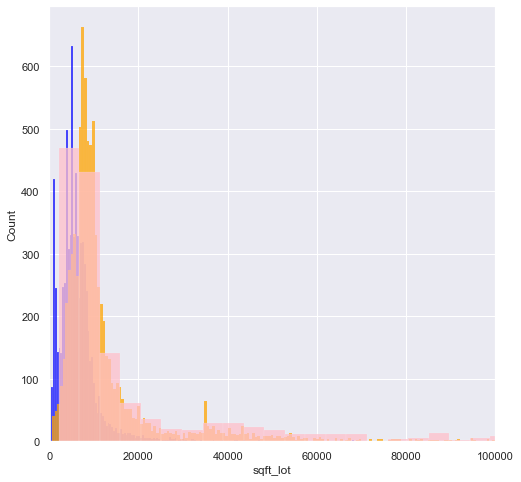

In [47]:
sns.histplot(data= seattle_df, x = 'sqft_lot', color = 'blue', label ='City Living Space', bins = 'auto')
sns.histplot(data= suburb_df, x = 'sqft_lot', color = 'orange', label ='Suburb Living Space', bins = 'auto')
sns.histplot(data= rural_df, x = 'sqft_lot', color = 'pink', label='Rural Living Space', bins = 'auto')

plt.xlim(0, 100000)

In [48]:

seattle_df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.716611
grade            0.685751
sqft_above       0.667403
sqft_living15    0.625163
bathrooms        0.516036
view             0.407654
bedrooms         0.307603
floors           0.275986
lat              0.228780
waterfront       0.183950
zipcode          0.163277
condition        0.155631
yr_renovated     0.154656
sqft_lot         0.125912
long             0.084008
sqft_lot15       0.079452
yr_built         0.064948
Name: price, dtype: float64

In [49]:
rural_df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.787316
sqft_above       0.753313
grade            0.722475
sqft_living15    0.684376
bathrooms        0.563281
sqft_lot         0.345487
sqft_lot15       0.332909
bedrooms         0.311554
floors           0.299761
yr_built         0.283327
view             0.260385
lat              0.245276
zipcode          0.206664
condition        0.182596
waterfront       0.117402
long             0.033885
yr_renovated     0.000641
Name: price, dtype: float64

In [50]:
suburb_df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.735714
grade            0.682336
sqft_above       0.640891
sqft_living15    0.637310
bathrooms        0.574054
view             0.443641
waterfront       0.368133
lat              0.350331
bedrooms         0.315965
floors           0.249524
yr_built         0.171783
yr_renovated     0.151632
sqft_lot15       0.125208
sqft_lot         0.117241
long             0.100424
zipcode          0.081360
condition        0.049595
Name: price, dtype: float64

In [75]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [82]:
haversine_distance(45, -50.55, 43, -128)

5950.56

In [55]:
lats = eda_df['lat']
longs = eda_df['long']

In [85]:
def distance_from_cc(lat, long):
    return haversine_distance(lat, long, 47.606, -122.332)

In [86]:
distance_from_cc(47.1, -121.8)

69.08

In [87]:
eda_df['distance_from_seattle'] = distance_from_cc(eda_df['lat'], eda_df['long'])

In [88]:
eda_df

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_seattle
0,405000.0,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,...,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433,23.06
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,...,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063,10.08
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,...,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018,34.79
3,4670000.0,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,...,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454,10.65
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,...,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200,6.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,288000.0,7/31/2014,3,1.75,1660,10440,1.0,0.0,0.0,3,...,1040,620.0,1978,0.0,98045,47.4448,-121.770,1240,10380,45.85
17273,525000.0,3/13/2015,3,2.50,2200,4544,2.0,0.0,0.0,3,...,2200,0.0,2000,0.0,98065,47.5319,-121.867,2400,5431,35.85
17274,290000.0,7/24/2014,2,1.50,770,850,2.0,0.0,0.0,3,...,770,0.0,2006,0.0,98116,47.5644,-122.388,1350,915,6.25
17275,465000.0,3/27/2015,5,1.75,2000,10246,1.0,0.0,2.0,3,...,1200,800.0,1953,0.0,98178,47.5084,-122.246,2340,9030,12.63


In [89]:
distance_from_cc(47.438, -122.152)

23.06

In [93]:
eda_df['distance_from_seattle'].sort_values(ascending=True)

15611     1.35
11075     1.37
6253      1.39
13858     1.42
5137      1.42
         ...  
10965    73.75
13199    74.34
14998    76.35
10478    76.80
17249    77.06
Name: distance_from_seattle, Length: 17277, dtype: float64

<AxesSubplot:>

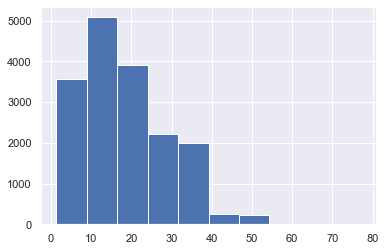

In [94]:
eda_df['distance_from_seattle'].hist()

In [100]:
bins_list = [0, 10, 20, 30, 40, 50, 60]

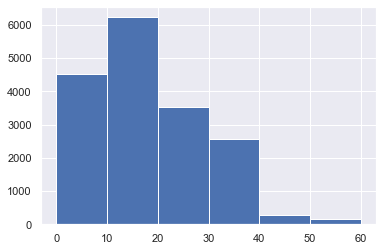

In [101]:
counts, bins, bars = plt.hist(eda_df['distance_from_seattle'], bins = bins_list)

In [102]:
counts

array([4511., 6231., 3528., 2565.,  277.,  152.])

In [103]:
bins

array([ 0, 10, 20, 30, 40, 50, 60])

In [105]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle', data = eda_df).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1520.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):          8.40e-319
Time:                        12:44:17   Log-Likelihood:            -2.4523e+05
No. Observations:               17277   AIC:                         4.905e+05
Df Residuals:                   17275   BIC:                         4.905e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.221e+05   5380.432    134.200      0.000    7.12e+05    7.33e+05
distance_from_seattle -9868.4528    253.094    -38.991      0.000   -1.04e+04   -9372.362
==============================================================================
Omnibus:                    15945.402   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1204537.589
Skew:                           4.218   Prob(JB):                         0.00
Kurtosis:                      43.026   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
ten_or_less = eda_df.loc[eda_df['distance_from_seattle'] <= 10]

five_to_ten = eda_df.loc[(eda_df['distance_from_seattle'] > 5) & (eda_df['distance_from_seattle'] <= 10)]



five_or_less = ten_or_less.loc[ten_or_less['distance_from_seattle'] <= 5]

ten_to_fifteen = eda_df.loc[(eda_df['distance_from_seattle'] > 10) & (eda_df['distance_from_seattle'] <= 15)]
fifteen_to_thirty = eda_df.loc[(eda_df['distance_from_seattle'] > 15) & (eda_df['distance_from_seattle'] <= 30)]




In [228]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = five_or_less).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     985.5
Date:                Tue, 24 Aug 2021   Prob (F-statistic):          1.95e-308
Time:                        16:11:37   Log-Likelihood:                -15016.
No. Observations:                1083   AIC:                         3.004e+04
Df Residuals:                    1079   BIC:                         3.006e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -9.39e+05   6.85e+04    -13.712      0.000   -1.07e+06   -8.05e+05
distance_from_seattle  2.164e+04   8499.399      2.546      0.011    4964.801    3.83e+04
sqft_living             333.4530     11.084     30.084      0.000     311.704     355.202
grade                  1.217e+05   9323.996     13.051      0.000    1.03e+05     1.4e+05
==============================================================================
Omnibus:                      594.942   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18799.260
Skew:                           1.933   Prob(JB):                         0.00
Kurtosis:                      23.041   Cond. No.                     1.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = five_to_ten).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2692.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:11:23   Log-Likelihood:                -47590.
No. Observations:                3434   AIC:                         9.519e+04
Df Residuals:                    3430   BIC:                         9.521e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -9.234e+05   4.31e+04    -21.436      0.000   -1.01e+06   -8.39e+05
distance_from_seattle   1.33e+04   3140.766      4.236      0.000    7145.016    1.95e+04
sqft_living             298.3164      6.852     43.539      0.000     284.883     311.750
grade                  1.216e+05   5675.858     21.424      0.000     1.1e+05    1.33e+05
==============================================================================
Omnibus:                     1755.665   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36138.371
Skew:                           1.961   Prob(JB):                         0.00
Kurtosis:                      18.401   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = ten_to_fifteen).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2153.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:10:22   Log-Likelihood:                -42430.
No. Observations:                3069   AIC:                         8.487e+04
Df Residuals:                    3065   BIC:                         8.489e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.883e+05   5.06e+04     -5.697      0.000   -3.87e+05   -1.89e+05
distance_from_seattle -3.458e+04   2939.228    -11.765      0.000   -4.03e+04   -2.88e+04
sqft_living             248.0793      7.445     33.324      0.000     233.483     262.676
grade                  1.067e+05   5815.821     18.340      0.000    9.53e+04    1.18e+05
==============================================================================
Omnibus:                     2598.920   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185678.983
Skew:                           3.587   Prob(JB):                         0.00
Kurtosis:                      40.424   Cond. No.                     2.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = Not_Seattle_df).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     6003.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:56:29   Log-Likelihood:            -1.3885e+05
No. Observations:               10077   AIC:                         2.777e+05
Df Residuals:                   10073   BIC:                         2.777e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.654e+05   2.05e+04     -8.065      0.000   -2.06e+05   -1.25e+05
distance_from_seattle -1.249e+04    254.011    -49.162      0.000    -1.3e+04    -1.2e+04
sqft_living             207.7669      4.013     51.779      0.000     199.901     215.632
grade                  6.871e+04   3117.461     22.039      0.000    6.26e+04    7.48e+04
==============================================================================
Omnibus:                     9819.817   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1015574.356
Skew:                           4.488   Prob(JB):                         0.00
Kurtosis:                      51.355   Cond. No.                     2.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = seattle_df).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     4510.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:00:12   Log-Likelihood:                -98009.
No. Observations:                7197   AIC:                         1.960e+05
Df Residuals:                    7193   BIC:                         1.961e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4.399e+05   2.09e+04    -21.060      0.000   -4.81e+05   -3.99e+05
distance_from_seattle -1.709e+04    480.361    -35.586      0.000    -1.8e+04   -1.62e+04
sqft_living             213.5113      3.971     53.771      0.000     205.727     221.295
grade                  1.038e+05   3179.043     32.651      0.000    9.76e+04     1.1e+05
==============================================================================
Omnibus:                     5395.586   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           467850.167
Skew:                           2.912   Prob(JB):                         0.00
Kurtosis:                      42.067   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Not_Seattle_df

In [225]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = fifteen_to_thirty).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     4980.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:09:51   Log-Likelihood:                -89202.
No. Observations:                6686   AIC:                         1.784e+05
Df Residuals:                    6682   BIC:                         1.784e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.231e+05   1.65e+04    -19.607      0.000   -3.55e+05   -2.91e+05
distance_from_seattle -9866.3724    452.730    -21.793      0.000   -1.08e+04   -8978.877
sqft_living             141.0038      3.225     43.729      0.000     134.683     147.325
grade                  9.293e+04   2446.565     37.986      0.000    8.81e+04    9.77e+04
==============================================================================
Omnibus:                     5156.216   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           297581.842
Skew:                           3.191   Prob(JB):                         0.00
Kurtosis:                      35.054   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
five_to_ten

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_seattle,distance_group
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,...,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200,6.65,"(5, 10]"
6,775000.0,3/13/2015,5,1.00,1860,3040,1.5,0.0,0.0,3,...,330.0,1921,0.0,98103,47.6559,-122.339,1910,3600,5.57,"(5, 10]"
9,505000.0,8/21/2014,3,2.00,1500,2500,2.0,0.0,0.0,3,...,0.0,2002,0.0,98107,47.6748,-122.385,1550,5000,8.62,"(5, 10]"
16,315000.0,10/2/2014,3,2.50,1570,2865,2.0,0.0,0.0,3,...,0.0,2003,0.0,98118,47.5412,-122.288,1610,2582,7.93,"(5, 10]"
29,360000.0,7/25/2014,5,1.75,1550,5225,1.5,NaN,0.0,4,...,0.0,1941,0.0,98108,47.5540,-122.306,1220,5225,6.10,"(5, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17255,585000.0,5/5/2014,2,1.00,1770,8640,1.5,0.0,0.0,3,...,250.0,1949,0.0,98117,47.6926,-122.363,1060,4804,9.91,"(5, 10]"
17257,329900.0,10/14/2014,2,2.50,980,1021,3.0,0.0,0.0,3,...,0.0,2008,0.0,98117,47.6844,-122.387,980,1023,9.64,"(5, 10]"
17264,415000.0,5/20/2014,3,2.25,1970,2377,2.0,0.0,0.0,3,...,290.0,2008,NaN,98108,47.5631,-122.297,1690,1936,5.44,"(5, 10]"
17267,1700000.0,12/30/2014,5,5.00,4930,14649,2.0,0.0,3.0,3,...,770.0,2000,NaN,98040,47.5829,-122.247,3030,8479,6.87,"(5, 10]"


In [135]:
five_or_less['price'].mean()

759796.2234533703

In [136]:
five_to_ten['price'].mean()

653246.1968549796

In [116]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle', data = ten_or_less).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.894
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0270
Time:                        13:02:38   Log-Likelihood:                -65420.
No. Observations:                4517   AIC:                         1.308e+05
Df Residuals:                    4515   BIC:                         1.309e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.257e+05   2.24e+04     32.462      0.000    6.82e+05     7.7e+05
distance_from_seattle -6907.3323   3122.409     -2.212      0.027    -1.3e+04    -785.882
==============================================================================
Omnibus:                     3914.502   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178032.374
Skew:                           3.943   Prob(JB):                         0.00
Kurtosis:                      32.728   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
ten_or_less.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_seattle
count,4.517000e+03,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4016.000000,4506.000000,4517.000000,4517.000000,4517.000000,4517.000000,3705.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000
mean,6.787927e+05,3.214523,2.018154,1912.853000,5250.369493,1.560881,0.003486,0.310697,3.476201,7.572282,1518.620766,1952.590658,155.298516,98114.332079,47.614187,-122.331095,1768.975869,5163.294000,6.797897
std,4.720605e+05,1.131238,0.842832,932.403665,4121.939779,0.596390,0.058947,0.839775,0.723313,1.124221,735.330333,36.345326,535.014536,33.193957,0.054161,0.050220,605.721198,3315.510792,2.248763
min,9.000000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,1900.000000,0.000000,98004.000000,47.516700,-122.416000,620.000000,651.000000,1.350000
25%,4.190000e+05,3.000000,1.500000,1280.000000,3175.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1030.000000,1923.000000,0.000000,98106.000000,47.563500,-122.375000,1380.000000,3738.000000,5.150000
50%,5.550000e+05,3.000000,2.000000,1690.000000,4730.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1330.000000,1946.000000,0.000000,98115.000000,47.623200,-122.337000,1620.000000,4800.000000,7.200000
75%,7.620000e+05,4.000000,2.500000,2330.000000,6000.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1770.000000,1990.000000,0.000000,98122.000000,47.666000,-122.294000,1970.000000,6000.000000,8.720000
max,7.700000e+06,33.000000,8.000000,12050.000000,91681.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.695600,-122.199000,5500.000000,42730.000000,10.000000


In [110]:
ten_or_less['price'].mean()

678792.7274739872

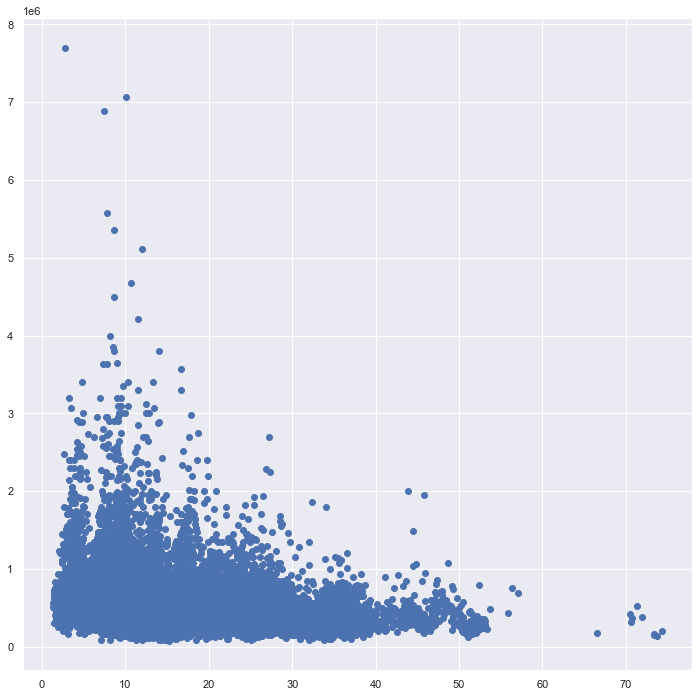

In [167]:
plt.figure(figsize = (12, 12))

plt.scatter(x = eda_df['distance_from_seattle'], y = eda_df['price'])

In [115]:
twenty_or_less = eda_df.loc[eda_df['distance_from_seattle'] <= 20]


In [140]:
ten_to_twenty = twenty_or_less.loc[twenty_or_less['distance_from_seattle'] > 10]
ten_to_fifteen = ten_to_twenty.loc[ten_to_twenty['distance_from_seattle'] <= 15]
fifteen_to_twenty = ten_to_twenty.loc[ten_to_twenty['distance_from_seattle'] > 15]



In [141]:
ten_to_fifteen['price'].mean()

582769.0351906158

In [142]:
fifteen_to_twenty['price'].mean()

519009.50727848103

In [138]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle', data = ten_to_twenty).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     51.43
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           8.29e-13
Time:                        13:20:29   Log-Likelihood:                -88613.
No. Observations:                6229   AIC:                         1.772e+05
Df Residuals:                    6227   BIC:                         1.772e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.269e+05    2.5e+04     29.030      0.000    6.78e+05    7.76e+05
distance_from_seattle -1.179e+04   1644.322     -7.171      0.000    -1.5e+04   -8568.559
==============================================================================
Omnibus:                     5432.609   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           304474.789
Skew:                           3.916   Prob(JB):                         0.00
Kurtosis:                      36.343   Cond. No.                         82.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
ten_to_twenty['price'].mean()

550423.5370043346

In [209]:
thirty_or_less = eda_df.loc[eda_df['distance_from_seattle'] <= 30]
twenty_to_thirty = thirty_or_less.loc[thirty_or_less['distance_from_seattle'] > 20]
twenty_to_twentyfive = twenty_to_thirty.loc[twenty_to_thirty['distance_from_seattle'] <= 25]
twentyfive_to_thirty = twenty_to_thirty.loc[twenty_to_thirty['distance_from_seattle'] > 25]

ten_to_thirty = eda_df.loc[(eda_df['distance_from_seattle'] > 10) & (eda_df['distance_from_seattle'] <= 30)]



In [144]:
twenty_to_twentyfive['price'].mean()

525795.4432029795

In [145]:
twentyfive_to_thirty['price'].mean()

479003.47677793907

In [123]:
twenty_to_thirty['price'].mean()

507508.6225184345

In [146]:
more_than_thirty = eda_df.loc[eda_df['distance_from_seattle'] > 30]

In [147]:
more_than_thirty['price'].mean()

349825.803327787

In [126]:
fourty_or_less = eda_df.loc[edsa_df['distance_from_seattle'] <= 40]
thirty_to_fourty = fourty_or_less.loc[fourty_or_less['distance_from_seattle'] > 30]

In [128]:
thirty_to_fourty['price'].mean()

345443.7593603744

In [ ]:
ten_or_less

In [221]:
inmiddle_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = ten_to_twenty).fit()

inmiddle_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3914.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:51:11   Log-Likelihood:                -85337.
No. Observations:                6229   AIC:                         1.707e+05
Df Residuals:                    6225   BIC:                         1.707e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -3.4e+05   2.55e+04    -13.318      0.000    -3.9e+05    -2.9e+05
distance_from_seattle -2.171e+04    977.672    -22.210      0.000   -2.36e+04   -1.98e+04
sqft_living             198.2475      4.775     41.517      0.000     188.887     207.608
grade                  1.057e+05   3642.218     29.030      0.000    9.86e+04    1.13e+05
==============================================================================
Omnibus:                     6000.340   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           717989.476
Skew:                           4.318   Prob(JB):                         0.00
Kurtosis:                      54.883   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
outsidecity_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = twenty_to_thirty).fit()

outsidecity_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3210.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:47:30   Log-Likelihood:                -46588.
No. Observations:                3526   AIC:                         9.318e+04
Df Residuals:                    3522   BIC:                         9.321e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.252e+05   2.75e+04     -8.193      0.000   -2.79e+05   -1.71e+05
distance_from_seattle -1.019e+04    823.340    -12.382      0.000   -1.18e+04   -8580.201
sqft_living             144.8364      3.792     38.194      0.000     137.401     152.271
grade                  8.056e+04   2940.988     27.391      0.000    7.48e+04    8.63e+04
==============================================================================
Omnibus:                      874.646   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.610
Skew:                           1.083   Prob(JB):                         0.00
Kurtosis:                       8.150   Cond. No.                     3.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
city_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade', data = ten_or_less).fit()

city_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     3673.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:46:56   Log-Likelihood:                -62631.
No. Observations:                4517   AIC:                         1.253e+05
Df Residuals:                    4513   BIC:                         1.253e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8.374e+05   3.37e+04    -24.880      0.000   -9.03e+05   -7.71e+05
distance_from_seattle   747.4196   1701.033      0.439      0.660   -2587.438    4082.277
sqft_living             309.5112      5.828     53.105      0.000     298.085     320.938
grade                  1.214e+05   4860.303     24.973      0.000    1.12e+05    1.31e+05
==============================================================================
Omnibus:                     2318.865   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54672.779
Skew:                           1.938   Prob(JB):                         0.00
Kurtosis:                      19.597   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
dist_model = sm.formula.ols(formula='price ~ distance_from_seattle + sqft_living + grade + sqft_living15', data = thirty_or_less).fit()

dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     7229.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:44:53   Log-Likelihood:            -1.9599e+05
No. Observations:               14272   AIC:                         3.920e+05
Df Residuals:                   14267   BIC:                         3.920e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.421e+05    1.5e+04    -22.820      0.000   -3.72e+05   -3.13e+05
distance_from_seattle -1.836e+04    276.016    -66.528      0.000   -1.89e+04   -1.78e+04
sqft_living             192.1980      3.467     55.439      0.000     185.403     198.993
grade                  7.808e+04   2568.052     30.406      0.000    7.31e+04    8.31e+04
sqft_living15            96.1596      4.426     21.724      0.000      87.483     104.836
==============================================================================
Omnibus:                    12920.093   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1358131.070
Skew:                           3.949   Prob(JB):                         0.00
Kurtosis:                      50.133   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
three_beds = eda_df.loc[eda_df['bedrooms'] == 3]
three_beds

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_seattle,distance_group
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,...,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063,10.08,"(10, 15]"
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,...,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018,34.79,"(30, 35]"
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,...,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200,6.65,"(5, 10]"
5,239000.0,6/3/2014,3,1.00,1040,6860,2.0,0.0,0.0,3,...,0.0,1942,NaN,98146,47.5121,-122.375,1030,6512,10.93,"(10, 15]"
8,289900.0,2/19/2015,3,1.00,1180,7068,1.0,0.0,0.0,3,...,?,1944,NaN,98178,47.4947,-122.238,1180,7068,14.25,"(10, 15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17266,665000.0,5/23/2014,3,2.75,1800,9550,1.0,0.0,0.0,4,...,480.0,1966,0.0,98006,47.5679,-122.178,1890,9902,12.30,"(10, 15]"
17268,310000.0,9/9/2014,3,1.00,1990,7173,1.0,0.0,0.0,3,...,0.0,1972,0.0,98034,47.7116,-122.213,1320,7245,14.74,"(10, 15]"
17271,249900.0,7/17/2014,3,1.75,2080,12522,1.0,0.0,0.0,5,...,0.0,1950,0.0,98001,47.2670,-122.250,1690,11200,38.20,"(35, 40]"
17272,288000.0,7/31/2014,3,1.75,1660,10440,1.0,0.0,0.0,3,...,620.0,1978,0.0,98045,47.4448,-121.770,1240,10380,45.85,"(45, 50]"


In [229]:
eda_df



eda_df['distance_group'] = pd.cut(eda_df.distance_from_seattle, range(0, 80, 5))
          


eda_df = eda_df.dropna(subset = ['distance_group'])

eda_df 




,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_seattle,distance_group
0,405000.0,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,...,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433,23.06,"(20, 25]"
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,...,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063,10.08,"(10, 15]"
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,...,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018,34.79,"(30, 35]"
3,4670000.0,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,...,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454,10.65,"(10, 15]"
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,...,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200,6.65,"(5, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,288000.0,7/31/2014,3,1.75,1660,10440,1.0,0.0,0.0,3,...,620.0,1978,0.0,98045,47.4448,-121.770,1240,10380,45.85,"(45, 50]"
17273,525000.0,3/13/2015,3,2.50,2200,4544,2.0,0.0,0.0,3,...,0.0,2000,0.0,98065,47.5319,-121.867,2400,5431,35.85,"(35, 40]"
17274,290000.0,7/24/2014,2,1.50,770,850,2.0,0.0,0.0,3,...,0.0,2006,0.0,98116,47.5644,-122.388,1350,915,6.25,"(5, 10]"
17275,465000.0,3/27/2015,5,1.75,2000,10246,1.0,0.0,2.0,3,...,800.0,1953,0.0,98178,47.5084,-122.246,2340,9030,12.63,"(10, 15]"


In [196]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

trans = ohe.fit_transform(eda_df[['distance_group']])

data = trans.todense()
names = ohe.get_feature_names()

dummies = pd.DataFrame(data, columns=names)
dummy_df = pd.concat([eda_df[['price','sqft_living', 'condition']], dummies], axis = 1)

In [197]:
dummy_df = dummy_df.dropna()

In [198]:
Y = dummy_df['price']
X = dummy_df.drop('price', axis=1)
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1387.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:15:02   Log-Likelihood:            -2.3905e+05
No. Observations:               17271   AIC:                         4.781e+05
Df Residuals:                   17255   BIC:                         4.783e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.794e+04   1.35e+04     -2.820      0.005   -6.43e+04   -1.16e+04
sqft_living   288.9797      2.078    139.090      0.000     284.907     293.052
condition    3.802e+04   2919.118     13.025      0.000    3.23e+04    4.37e+04
x0_(5, 10]  -5.364e+04   8660.891     -6.193      0.000   -7.06e+04   -3.67e+04
x0_(10, 15] -1.131e+05   8780.684    -12.876      0.000    -1.3e+05   -9.59e+04
x0_(15, 20] -1.715e+05   8747.941    -19.600      0.000   -1.89e+05   -1.54e+05
x0_(20, 25] -2.057e+05   9269.196    -22.193      0.000   -2.24e+05   -1.88e+05
x0_(25, 30] -2.326e+05   1.01e+04    -23.032      0.000   -2.52e+05   -2.13e+05
x0_(30, 35] -2.682e+05   9720.982    -27.588      0.000   -2.87e+05   -2.49e+05
x0_(35, 40] -2.614e+05   1.11e+04    -23.447      0.000   -2.83e+05    -2.4e+05
x0_(40, 45] -2.212e+05   2.24e+04     -9.886      0.000   -2.65e+05   -1.77e+05
x0_(45, 50]  -2.06e+05   2.25e+04     -9.149      0.000    -2.5e+05   -1.62e+05
x0_(50, 55]  -2.78e+05   2.17e+04    -12.804      0.000   -3.21e+05   -2.35e+05
x0_(55, 60] -4.163e+05   1.44e+05     -2.899      0.004   -6.98e+05   -1.35e+05
x0_(65, 70] -2.426e+05   2.48e+05     -0.976      0.329    -7.3e+05    2.44e+05
x0_(70, 75] -2.373e+05   8.31e+04     -2.854      0.004      -4e+05   -7.43e+04
==============================================================================
Omnibus:                    12362.980   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           559144.805
Skew:                           2.937   Prob(JB):                         0.00
Kurtosis:                      30.249   Cond. No.                     2.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""